# Part 1 Let's start with Convnet - Mnist dataset

## Dataset

In [1]:
import keras
from keras.utils import to_categorical
from keras.datasets import mnist

(img_train, label_train), (img_test, label_test) = mnist.load_data()

# (img_train, label_train), (img_test, label_test) = keras.datasets.fashion_mnist.load_data()

img_train = img_train.astype('float32') / 255
img_test = img_test.astype('float32') / 255

# img_train = img_train.reshape(60000, 28, 28, 1)
# img_test = img_test.reshape(10000, 28, 28, 1)


train_labels = to_categorical(label_train)
test_labels = to_categorical(label_test)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [2]:
img_train.shape

(60000, 28, 28)

## Convnet architecture

In [3]:
from keras import layers

model = keras.Sequential()
# model.add(layers.Input((28, 28, 1)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 55,744 (217.75 KB)

 Trainable params: 55,744 (217.75 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

## Training and evaluation

In [7]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
history = model.fit(img_train, train_labels, batch_size=64, epochs=5)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.8569 - loss: 0.4458
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9845 - loss: 0.0489
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9893 - loss: 0.0314
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9922 - loss: 0.0244
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9939 - loss: 0.0212


In [9]:
model.evaluate(img_test, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9899 - loss: 0.0286


[0.023741263896226883, 0.9922000169754028]

In [10]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss'])

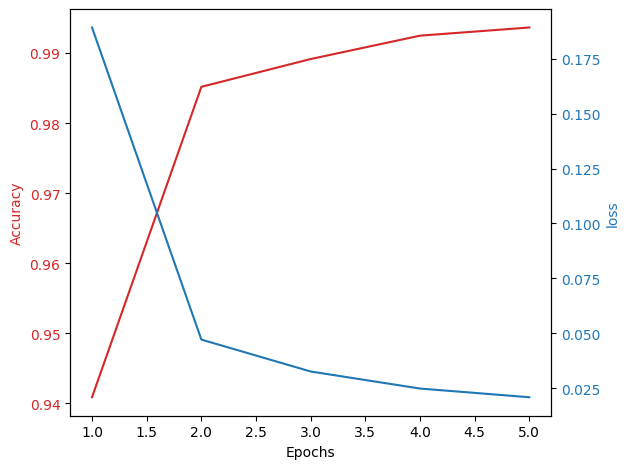

In [11]:
import matplotlib.pyplot as plt

epochs = range(1, len(history_dict['loss']) + 1)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy', color=color)
ax1.plot(epochs, history_dict['accuracy'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('loss', color=color)
ax2.plot(epochs, history_dict['loss'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

# Part 2 ConvNet for small dataset

## Dataset

In [12]:
! gdown --id 1rmALBuGdZUnNf3Ue5lnNFjiOs1FCsON1
! unzip /content/dataset_cats_dogs.zip

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1rmALBuGdZUnNf3Ue5lnNFjiOs1FCsON1
From (redirected): https://drive.google.com/uc?id=1rmALBuGdZUnNf3Ue5lnNFjiOs1FCsON1&confirm=t&uuid=8988e8a8-d17f-4655-a41e-273ad42ed959
To: /content/dataset_cats_dogs.zip
100% 91.0M/91.0M [00:04<00:00, 22.0MB/s]
Archive:  /content/dataset_cats_dogs.zip
   creating: dataset_cats_dogs/
   creating: dataset_cats_dogs/cats/
  inflating: dataset_cats_dogs/cats/cat.0.jpg  
  inflating: dataset_cats_dogs/cats/cat.1.jpg  
  inflating: dataset_cats_dogs/cats/cat.10.jpg  
  inflating: dataset_cats_dogs/cats/cat.100.jpg  
  inflating: dataset_cats_dogs/cats/cat.1000.jpg  
  inflating: dataset_cats_dogs/cats/cat.1001.jpg  
  inflating: dataset_cats_dogs/cats/cat.1002.jpg  
  inflating:

In [13]:
import os
import shutil
from sklearn.model_selection import train_test_split


original_dataset_dir = '/content/dataset_cats_dogs'
cats_dir = os.path.join(original_dataset_dir, 'cats')
dogs_dir = os.path.join(original_dataset_dir, 'dogs')


base_dir = '/content/dataset_split'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')


os.makedirs(os.path.join(train_dir, 'class_a'), exist_ok=True) # cats -> class_a
os.makedirs(os.path.join(train_dir, 'class_b'), exist_ok=True) # dogs -> class_b
os.makedirs(os.path.join(validation_dir, 'class_a'), exist_ok=True)
os.makedirs(os.path.join(validation_dir, 'class_b'), exist_ok=True)
os.makedirs(os.path.join(test_dir, 'class_a'), exist_ok=True)
os.makedirs(os.path.join(test_dir, 'class_b'), exist_ok=True)


def copy_images(filenames, source_dir, target_dir):
    for filename in filenames:
        src = os.path.join(source_dir, filename)
        dst = os.path.join(target_dir, filename)
        shutil.copyfile(src, dst)


cat_filenames = [f for f in os.listdir(cats_dir) if f.endswith('.jpg')]
dog_filenames = [f for f in os.listdir(dogs_dir) if f.endswith('.jpg')]


train_cats, test_cats = train_test_split(cat_filenames, test_size=0.5, random_state=42)
test_cats, val_cats = train_test_split(test_cats, test_size=0.5, random_state=42)

train_dogs, test_dogs = train_test_split(dog_filenames, test_size=0.5, random_state=42)
test_dogs, val_dogs = train_test_split(test_dogs, test_size=0.5, random_state=42)


copy_images(train_cats, cats_dir, os.path.join(train_dir, 'class_a'))
copy_images(val_cats, cats_dir, os.path.join(validation_dir, 'class_a'))
copy_images(test_cats, cats_dir, os.path.join(test_dir, 'class_a'))

copy_images(train_dogs, dogs_dir, os.path.join(train_dir, 'class_b'))
copy_images(val_dogs, dogs_dir, os.path.join(validation_dir, 'class_b'))
copy_images(test_dogs, dogs_dir, os.path.join(test_dir, 'class_b'))

print("Zakończono podział zbioru danych.")


Zakończono podział zbioru danych.


In [14]:
test_dir = '/content/dataset_split/validation'

# Zliczanie plików w podfolderach
def count_files_in_directory(directory):
    total_files = 0
    for root, dirs, files in os.walk(directory):
        total_files += len(files)
    return total_files

# Liczba plików w folderze 'test'
total_test_files = count_files_in_directory(test_dir)
print(f'Liczba plików w folderze test: {total_test_files}')

Liczba plików w folderze test: 1000


### Dostęp do Google Drive

In [15]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


Kopiowanie datasetu do Google Drive

In [16]:
!cp -r /content/dataset_split /content/drive/MyDrive/Machine_Learning

Wczytanie datasetu

In [17]:
from google.colab import drive
drive.mount('/content/drive')

# Ścieżka do datasetu na Google Drive
dataset_path = '/content/drive/MyDrive/Machine_Learning/dataset_split'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Network architecture

In [18]:
model_2 = keras.Sequential()
model_2.add(layers.Input((150, 150, 3)))
model_2.add(layers.Conv2D(32, (3, 3), activation='relu'))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Flatten())
model_2.add(layers.Dense(512, activation='relu'))
model_2.add(layers.Dense(1, activation='sigmoid'))

In [19]:
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model_2.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

## Data preprocessing

In [21]:
from tensorflow.keras.preprocessing import  image_dataset_from_directory

dataset = '/content/dataset_split/'
train_dir = os.path.join(dataset, 'train')
test_dir = os.path.join(dataset, 'test')
val_dir = os.path.join(dataset, 'validation')

train_dataset = image_dataset_from_directory(
    train_dir,  # This is the target directory
    labels="inferred",
    label_mode="binary", # Since we use binary_crossentropy loss, we need binary labels
    class_names=None,
    color_mode="rgb",
    batch_size=20,
    image_size=(150,150), # All images have different sizes and will be resized to 150x150
    shuffle=True,
)

val_dataset = image_dataset_from_directory(
    val_dir,  # This is the target directory
    labels="inferred",
    label_mode="binary", # Since we use binary_crossentropy loss, we need binary labels
    class_names=None,
    color_mode="rgb",
    batch_size=20,
    image_size=(150,150), # All images have different sizes and will be resized to 150x150
    shuffle=True,
)

test_dataset = image_dataset_from_directory(
    test_dir,  # This is the target directory
    labels="inferred",
    label_mode="binary", # Since we use binary_crossentropy loss, we need binary labels
    class_names=None,
    color_mode="rgb",
    batch_size=20,
    image_size=(150,150), # All images have different sizes and will be resized to 150x150
    shuffle=True,
)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


## Model training

In [22]:
history = model_2.fit(train_dataset, epochs=30, validation_data=val_dataset)

Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - accuracy: 0.5156 - loss: 85.1836 - val_accuracy: 0.5010 - val_loss: 0.9241
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.5264 - loss: 1.0054 - val_accuracy: 0.5040 - val_loss: 0.6837
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.5736 - loss: 0.7538 - val_accuracy: 0.5040 - val_loss: 0.6986
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.5775 - loss: 0.7137 - val_accuracy: 0.6100 - val_loss: 0.6926
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.5815 - loss: 0.7335 - val_accuracy: 0.6070 - val_loss: 0.6559
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.6497 - loss: 0.6483 - val_accuracy: 0.6530 - val_loss: 0.6297
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.6881 - loss: 0.6045 - val_accuracy: 0.5770 - val_loss: 1.7650
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - accuracy: 0.7577 - loss: 0.5710 - val_acc

## Outcome analysis

In [23]:
model_2.evaluate(test_dataset)

50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.6712 - loss: 8.1858


[7.918557643890381, 0.6620000004768372]

In [24]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

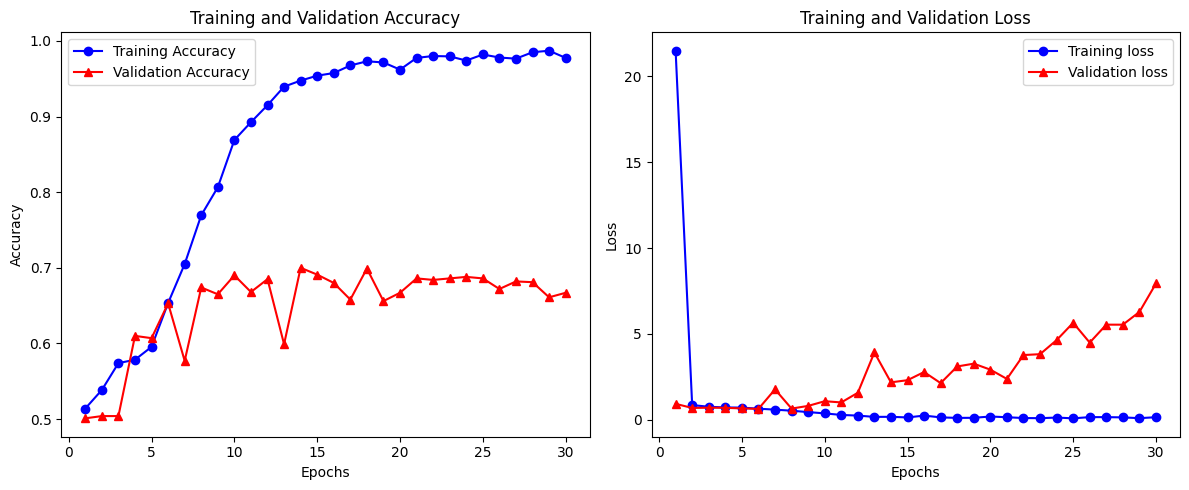

In [25]:
import matplotlib.pyplot as plt

epochs = range(1, len(history_dict['loss']) + 1)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(epochs, history_dict['accuracy'], 'bo-', label='Training Accuracy')
ax[0].plot(epochs, history_dict['val_accuracy'], 'r^-', label='Validation Accuracy')
ax[0].set_title('Training and Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend()

ax[1].plot(epochs, history_dict['loss'], 'bo-', label='Training loss')
ax[1].plot(epochs, history_dict['val_loss'], 'r^-', label='Validation loss')
ax[1].set_title('Training and Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend()

fig.tight_layout()
plt.show()